# UNIT 06 기온 데이터를 다양하게 시각화하기

## 1. 데이터에 질문하기
---
데이터를 꺾은선 그래프가 아닌 다른 형태로 시각화 해보자.

## 2. 히스토그램
---

### `hist()`함수
---
히스토그램은 자료의 분포 상태를 직사각형 모양의 막대 그래프로 나타낸 것으로, 데이터의 빈도에 따라 높이가 결정된다. `hist()` 함수를 사용하면 히스토그램을 그릴 수 있다.

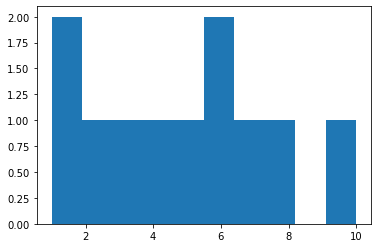

In [1]:
import matplotlib.pyplot as plt

plt.hist([1,1,2,3,4,5,6,6,7,8,10])
plt.show()

`hist()` 함수로 입력된 데이터를 보면 1과 6이 두개씩 있고, 9를 제외한 나머지 데이터는 한 개씩, 9는 아예 없는 것을 볼 수 있다.

### 주사위 시뮬레이션
---
임의의 수를 뽑는 랜덤 함수를 활용해 간단한 주사위 시뮬레이션을 만들어보자.

주사위 시뮬레이션은 다음과 같은 과정으로 진행한다.
* 주사위를 굴린다.
* 나온 결과를 기록한다.
* 1,2 과정을 n번 반복한다.
* 주사위의 눈이 나온 횟수를 히스토그램으로 그린다.

주사위 굴리는 것을 시뮬레이션 하기 위해 random 모듈의 `randint()` 함수를 사용한다.

In [2]:
import random

print(random.randint(1, 6))

1


주사위를 여러번 굴리는 상황을 시뮬레이션 하기 위해 `for` 문을 사용하고, `dice`라는 이름에 리스트에 순서대로 저장할 것이다.

In [3]:
dice = []
for i in range(5):
    dice.append(random.randint(1,6))
print(dice)

[3, 1, 5, 4, 1]


이제 이 결과를 히스토그램으로 표현해보자.

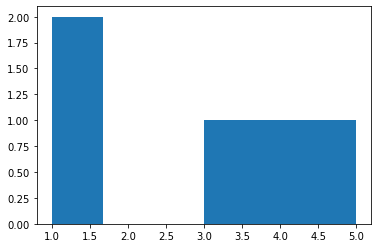

In [4]:
plt.hist(dice, bins=6)
plt.show()

이번에는 주사위를 100번 굴린 결과를 시뮬레이션 해보자.

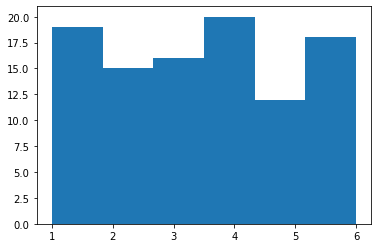

In [5]:
dice = []
for i in range(100):
    dice.append(random.randint(1,6))

plt.hist(dice, bins=6)
plt.show()

이번에는 주사위를 100만번 굴려보자.

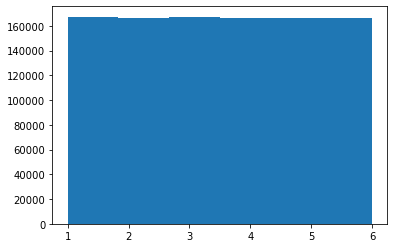

In [6]:
dice = []
for i in range(1000000):
    dice.append(random.randint(1,6))

plt.hist(dice, bins=6)
plt.show()

## 3. 기온데이터를 히스토그램으로 표현하기
---
이번에는 1907년 부터 2018년 까지 수집된 서울의 기온 데이터를 히스토그램으로 표현해보자.

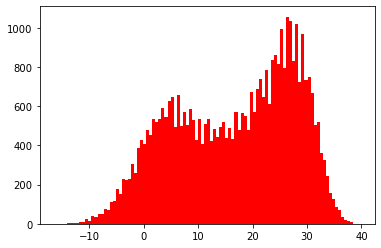

In [7]:
import csv

f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))
        
plt.hist(result, bins=100, color='r') # 히스토그램으로 나타내기
plt.show()

이번에는 8월의 데이터만 뽑아서 히스토그램으로 그려보자.

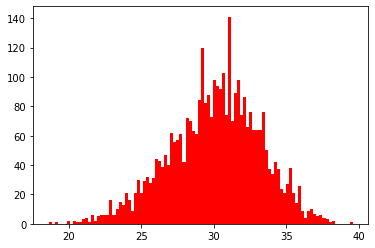

In [8]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)
aug = [] # 8월 최고 기온 값을 저장할 aug 리스트 생성

for row in data:
    month = row[0].split('-')[1] # -로 구분된 값 중 2번쨰 값을 month에 저장
    if row[-1] != '':
        if month == '08': # 8월이라면
            aug.append(float(row[-1])) # aug 리스트에 최고 기온 값 추가

plt.hist(aug, bins=100, color='r')
plt.show()

역대 8월에는 최고 기온이 30도 정도였던 날이 가장 많고, 최고기온이 20도 이하이거나 40도에 가까웠던 적은 거의 없다는 것을 알 수 있다.

### 1월과 8월의 데이터를 히스토그램으로 시각화하기
---

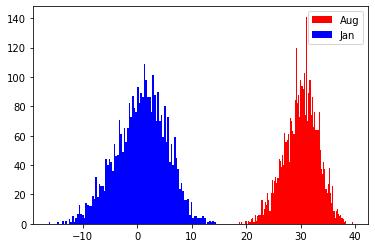

In [9]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)


aug = [] # 8월 최고 기온 값을 저장할 aug 리스트 생성
jan = [] # 1월 최고 기온 값을 저장할 jan 리스트 생성

for row in data:
    month = row[0].split('-')[1] # -로 구분된 값 중 2번쨰 값을 month에 저장
    if row[-1] != '':
        if month == '08': # 8월이라면
            aug.append(float(row[-1])) # aug 리스트에 최고 기온 값 추가
        if month == '01': # 1월이라면
            jan.append(float(row[-1])) # jan 리스트에 최고 기온 값 추가
            
plt.hist(aug, bins=100, color='r', label='Aug')
plt.hist(jan, bins=100, color='b', label='Jan')
plt.legend()
plt.show()

## 4. 기온 데이터를 상자 그림으로 표현하기
---
이번에는 데이터를 상자그림(boxplot) 형태로 시각화해보자. 상자그림은 가공하지 않은 자료를 그대로 이용하는 것이 아니라, 자료에서 얻어낸 최댓값, 최솟값, 상위 1/4, 2/4(중앙), 3/4에 위치한 값을 보여주는 그래프이다. `boxplot()` 함수로 만들 수 있다.

[25, 229, 304, 388, 445, 451, 519, 529, 582, 702, 810, 878, 904]


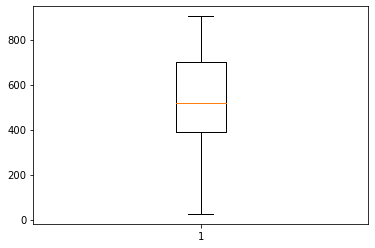

In [10]:
result = []
for i in range(13):
    result.append(random.randint(1,1000))

print(sorted(result))

plt.boxplot(result)
plt.show()

실행 결과를 보면 `result` 라는 리스트의 저장된 숫자들이 상자 그림에 표현된 것을 확인할 수 있다.

### 다른 위치 값이 알고 싶다면?
---
만약 1/4, 2/4, 3/4에 위치한 정확한 값이 알고 싶다면 이렇게 하면 된다.

In [11]:
import numpy as np

result = np.array(result)

print("1/4: "+str(np.percentile(result,25)))
print("2/4: "+str(np.percentile(result,50)))
print("3/4: "+str(np.percentile(result,75)))

1/4: 388.0
2/4: 519.0
3/4: 702.0


이제 서울의 최고 기온 데이터를 상자 그림으로 그려보자.

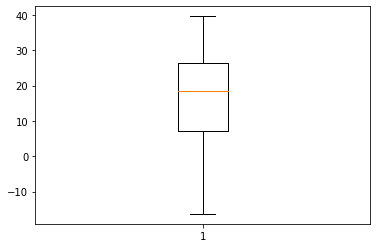

In [12]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)

result=[]

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))
        
plt.boxplot(result) # 상자 그림으로 나타내기
plt.show()

이번에는 1월과 8월의 상자 그림을 그려보자.

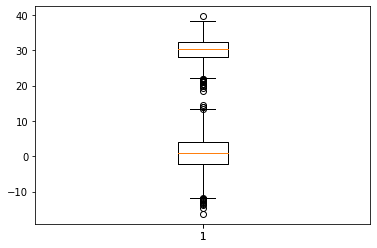

In [13]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)


aug = [] # 8월 최고 기온 값을 저장할 aug 리스트 생성
jan = [] # 1월 최고 기온 값을 저장할 jan 리스트 생성

for row in data:
    month = row[0].split('-')[1] # -로 구분된 값 중 2번쨰 값을 month에 저장
    if row[-1] != '':
        if month == '08': # 8월이라면
            aug.append(float(row[-1])) # aug 리스트에 최고 기온 값 추가
        if month == '01': # 1월이라면
            jan.append(float(row[-1])) # jan 리스트에 최고 기온 값 추가
            
plt.boxplot(aug)
plt.boxplot(jan)
plt.show()

상자 그림의 위, 아래에 그려진 동그라미는 무엇을 의미할까? 이는 __이상치(outlier)__값을 표현한 것으로, 다른 수치에 비해 너무 크거나 작은 값을 자동으로 나타낸 것이다.

만약 8월의 최고 기온 데이터와 1월의 최고 기온 데이터를 원소로 하는 리스트를 `boxplot()` 함수로 표현하면 어떨까?

<function matplotlib.pyplot.show(close=None, block=None)>

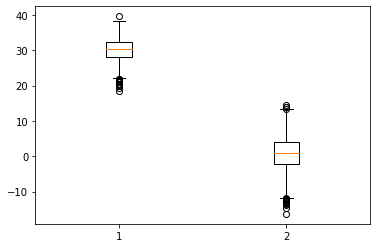

In [14]:
plt.boxplot([aug, jan])
plt.show

8월의 최고 기온 데이터를 표현한 상자 그림과 1월의 최고 기온 데이터를 표현한 상자 그림이 분리되어 표현되었다. 이 그래프를 보니 최고 기온 데이터를 월별로 구분해서 표현하고 싶어졌다.

1. 데이터를 월별로 분류해 저장한다.
2. 월별 데이터를 상자 그림으로 그린다.

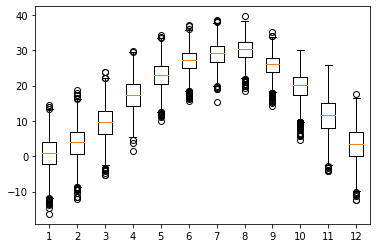

In [15]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)

# 월별 데이터를 저장할 리스트 month 생성(12개)
month = [[],[],[],[],[],[],[],[],[],[],[],[]]

for row in data:
    if row[-1] != '':
        # 월과 같은 번호의 인덱스에 월별 데이터 저장(예:1월->month[0])
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))
        
plt.boxplot(month)
plt.show()

코드를 설명해보자.

* 먼저 1월부터 12월 까지의 데이터 분류를 위해 빈 리스트를 12개 만든다.
* 날짜에서 추출한 월별 데이터를 정수로 변환한 1 ~ 12 사이의 수자에서 1을 뺀 값, 즉 0 ~ 11까지의 인덱스 값에 월별 데이터를 저장한다.(여기서 1을 빼는 이유는 0번 인덱스에 1월의 데이터를 저장하고, 11번 인덱스에는 12월 데이터를 저장하기 때문)

### 8월 일별 기온 데이터를 상자 그림으로 표현하기
---


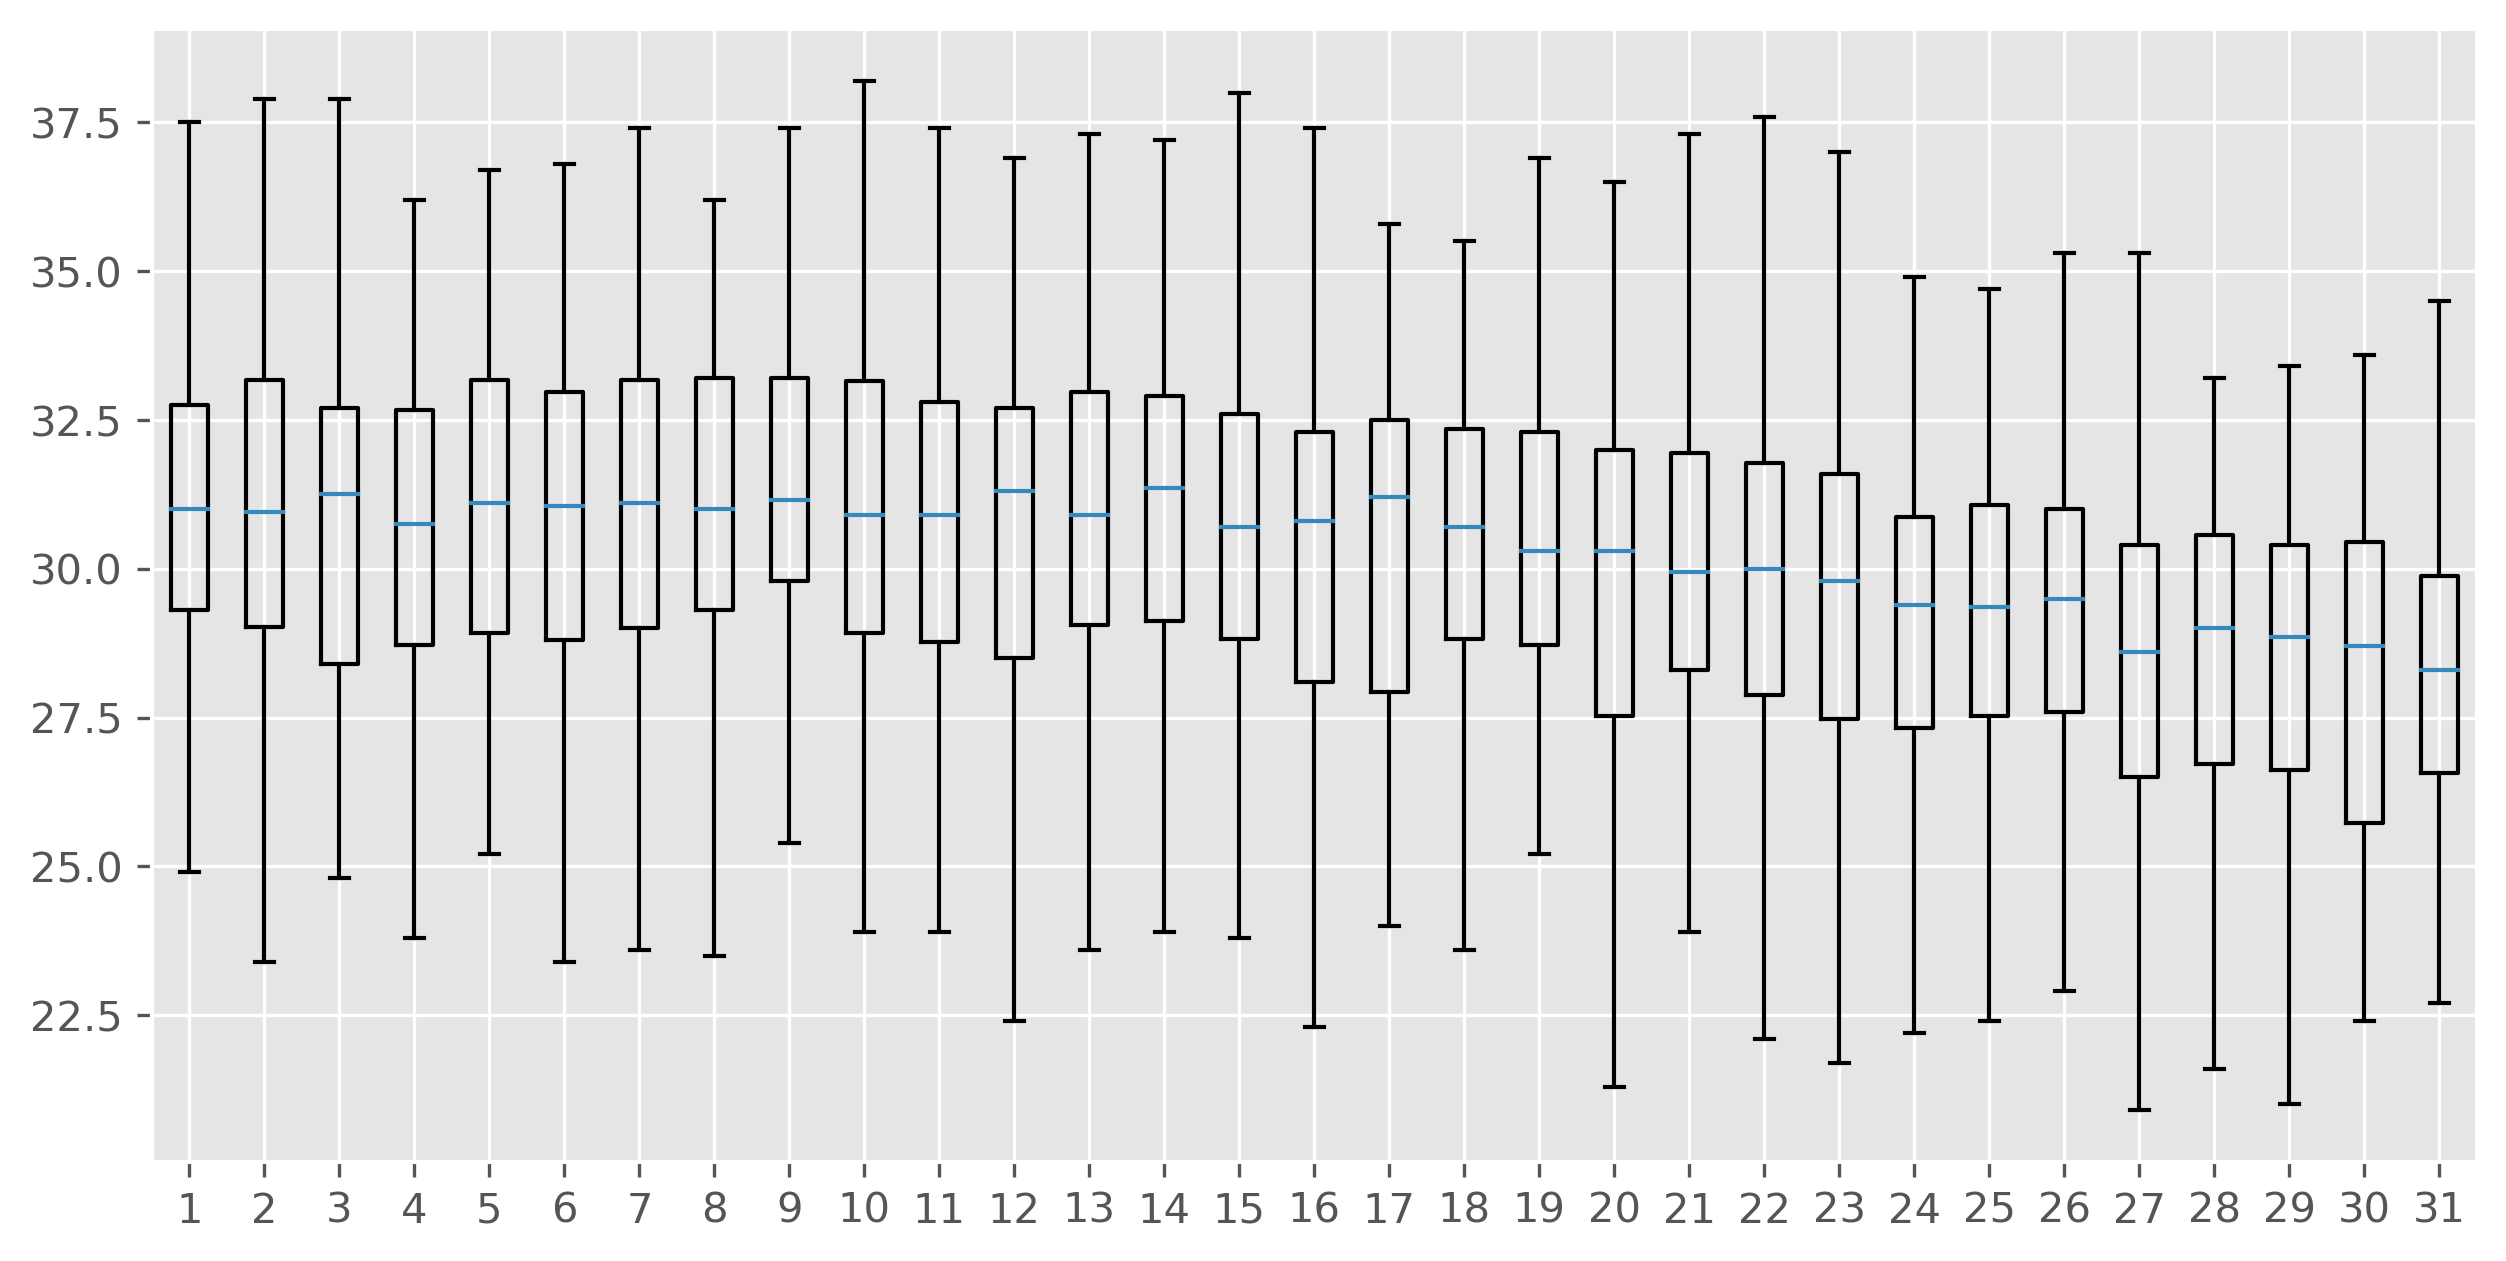

In [16]:
f = open('preprocessed_data_v1.csv', encoding='cp949')
data = csv.reader(f)
next(data)

day =[] #1. 일별데이터를 저장할 리스트 day 생성
for i in range(31):
    day.append([]) # 2. day 리스트 내 31개 리스트 생성
    
for row in data:
    if row[-1] != '':
        if row[0].split('-')[1] =='08': # 8월이라면
            # 최고 기온 값 저장
            day[int(row[0].split('-')[2])-1].append(float(row[-1]))
            
plt.style.use('ggplot') # 3. 그래프 스타일 지정
plt.figure(figsize=(10,5), dpi=300) # 4. 그래프 크기 수정
plt.boxplot(day, showfliers=False) # 5. 아웃라이어 값 생략

plt.show()

* 1에서 일별 데이터를 저장할 리스트 `day`를 만들고, 
* 2에서 `day`라는 리스트 안에 31개의 리스트를 추가했다.
* 3에서 `plt.style.use('ggplot')`라는 코드를 사용해서 ggplot 스타일로 지정했다.
* 4에서 그래프의 크기를 가로 10, 세로 5로 지정했다.
* 5에서 `showfliers=False`는 이상치를 표시하는 동그라미가 보이지 않게 하는 코드이다.